## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
subDataFile = ".\\dataProfitMarginSubset.csv"
data = pd.read_csv(subDataFile)
data = data.drop_duplicates('id')
print(data.columns)
data.head(3)

Index(['id', 'title', 'production_companies', 'production_countries', 'adult',
       'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count',
       'actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'acto

,id,title,production_companies,production_countries,adult,popularity,release_date,runtime,vote_average,vote_count,...,editorTot_HistAveRating,editorTot_AllAveRating,editorTot_AllVoteAveRating,keywordTot_AveRating,genreTot_RankedAveRating,budget,revenue,Domestic,BoxOfficeProfitMargin,profit_margin
0,862,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",True,21.946943,1995-10-30,81.0,7.7,5415.0,...,20.683709,6.726190,7.524399,6.378346,5.913436,30000000.0,373554033.0,223225679.0,644.085597,1145.18011
1,8844,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,17.015539,1995-12-15,104.0,6.9,2413.0,...,7.352651,6.227273,6.474549,6.078460,5.739320,65000000.0,262797249.0,100499940.0,54.615292,304.30346
2,15602,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,11.712900,1995-12-22,101.0,6.5,92.0,...,NaN,NaN,NaN,6.144337,5.756752,25000000.0,71500000.0,71518503.0,186.074012,186.00000


In [3]:
data.dropna(subset=['budget', 'Domestic'], inplace=True)

#cut out budgets under $2000 (value found in EDA)
data = data[data['budget']>2000]

#generate profit Ratio
data['profitRatio'] = data['Domestic']/data['budget']
data.dropna(subset=['profitRatio'], inplace=True)

## Split Data into Training/Test Sets

In [4]:
from sklearn.model_selection import train_test_split
X = data.loc[:, ~data.columns.isin(['id', 
                                    'title', 
                                    'production_companies', 
                                    'production_countries', 
                                    'adult',
                                    'BoxOfficeProfitMargin',
                                    'profit_margin',
                                    'release_date',
                                    'budget',
                                    'revenue',
                                    'Domestic',
                                    'profitRatio'])]
y = data[['profitRatio']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

## Fill Null values in X sets, add ouput parameter to y sets

In [5]:
generatedColumnList = ['actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'actors_Top3RankedAllMovieVoteAve_total', 'directorTot_AveRating',
       'directorTot_VoteAveRating', 'directorTot_HistAveRating',
       'directorTot_AllAveRating',
       'directorTot_AllVoteAveRating','screenwriterTot_AveRating',
       'screenwriterTot_VoteAveRating', 'screenwriterTot_HistAveRating',
       'screenwriterTot_AllAveRating','screenwriterTot_AllVoteAveRating',
       'editorTot_AveRating', 'editorTot_VoteAveRating',
       'editorTot_HistAveRating', 'editorTot_AllAveRating',
       'editorTot_AllVoteAveRating', 'keywordTot_AveRating',
       'genreTot_RankedAveRating'];

data[generatedColumnList].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 7584
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   actors_AveRating_average                6277 non-null   float64
 1   actors_AveRating_total                  6277 non-null   float64
 2   actors_RankedAveRating_average          6277 non-null   float64
 3   actors_RankedAveRating_total            6277 non-null   float64
 4   actors_Top3AveRating_total              6206 non-null   float64
 5   actors_VoteAve_average                  6275 non-null   float64
 6   actors_VoteAve_total                    6275 non-null   float64
 7   actors_RankedVoteAve_average            6275 non-null   float64
 8   actors_RankedVoteAve_total              6275 non-null   float64
 9   actors_Top3VoteAve_total                6205 non-null   float64
 10  actors_HistAve_average                  6277 non-null   floa

#### Fill null values of X columns with median of that column in Train set  (avoids data leakage)

In [6]:
medianReplacements = {}

for param in generatedColumnList:
    med = X_train[X_train[param].notnull()][param].median()
    medianReplacements[param] = med

X_train = X_train.fillna(value = medianReplacements)
X_test = X_test.fillna(value = medianReplacements)

#### Add boxcox parameter to Y 

C:\Users\Karl\AppData\Local\Temp/ipykernel_3756/519899423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[boxCoxString] = ret
C:\Users\Karl\AppData\Local\Temp/ipykernel_3756/519899423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[boxCoxString] = y_test['profitRatio']**lamb - 1


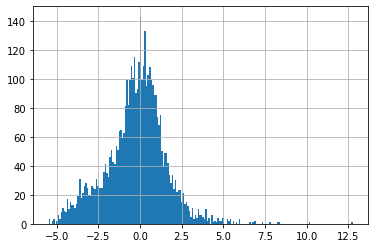

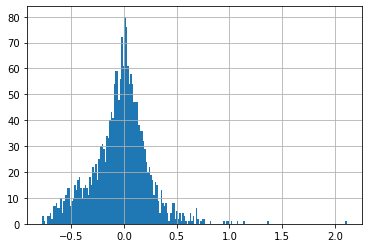

In [7]:
import scipy.stats
boxCoxString = 'profitRatio_BoxCox'

ret, lamb = scipy.stats.boxcox(y_train['profitRatio'])
y_train[boxCoxString] = ret


if(lamb == 0):
    y_test[boxCoxString] = y_test['profitRatio'].apply(log)
else:
    y_test[boxCoxString] = y_test['profitRatio']**lamb - 1
    
y_train[boxCoxString].hist(bins=200)
plt.show()

y_test[boxCoxString].hist(bins=200)
plt.show()

## Normalize X parameters

In [8]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_fitted = scalar.fit_transform(X_train)
X_train_fitted = pd.DataFrame(X_train_fitted, columns=X_train.columns) 


X_test_fitted = scalar.transform(X_test)
X_test_fitted = pd.DataFrame(X_test_fitted, columns=X_test.columns) 

In [9]:
X_train_fitted.describe()

,popularity,runtime,vote_average,vote_count,actors_AveRating_average,actors_AveRating_total,actors_RankedAveRating_average,actors_RankedAveRating_total,actors_Top3AveRating_total,actors_VoteAve_average,...,screenwriterTot_HistAveRating,screenwriterTot_AllAveRating,screenwriterTot_AllVoteAveRating,editorTot_AveRating,editorTot_VoteAveRating,editorTot_HistAveRating,editorTot_AllAveRating,editorTot_AllVoteAveRating,keywordTot_AveRating,genreTot_RankedAveRating
count,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,...,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03
mean,-4.345116e-17,2.501911e-16,1.679147e-16,-4.058439e-17,1.933508e-16,-3.302001e-17,-3.890993e-16,-2.110336e-16,-4.999392e-16,-9.670929e-16,...,3.971914e-16,1.771514e-15,-5.846523e-16,7.199998e-16,8.490861e-17,-1.922562e-16,4.825561e-16,-1.422884e-15,-5.069171e-16,6.161477e-15
std,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,...,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00
min,-6.836173e-01,-5.008621e+00,-6.682778e+00,-5.407880e-01,-1.569923e+01,-1.380327e+00,-3.132781e+00,-2.298619e+00,-5.161690e+00,-8.453183e+00,...,-1.775096e+00,-6.265008e+00,-6.167791e+00,-1.086467e+01,-5.984218e+00,-1.482316e+00,-6.938864e+00,-6.645860e+00,-9.340210e+00,-4.146216e+00
25%,-3.015022e-01,-6.280923e-01,-5.530906e-01,-4.876225e-01,-4.750440e-01,-5.945668e-01,-4.442973e-01,-6.748358e-01,1.320956e-02,-5.530455e-01,...,-2.058278e-01,-2.631658e-01,-2.591152e-01,-2.555986e-01,-3.596472e-01,-5.623457e-01,-4.552396e-01,-5.288461e-01,-5.573603e-01,-3.919926e-01
50%,-1.009227e-01,-1.669840e-01,9.213969e-02,-3.601939e-01,2.049986e-02,-2.215668e-01,-5.217888e-03,-2.285573e-01,3.621213e-01,3.878146e-02,...,-2.058278e-01,4.660673e-02,6.022912e-02,4.817420e-02,3.764264e-02,-2.119163e-01,6.956213e-03,1.478752e-02,6.246373e-03,1.111093e-01
75%,1.453319e-01,4.324568e-01,7.373699e-01,9.855179e-03,5.262006e-01,2.920079e-01,4.295232e-01,3.835902e-01,5.607774e-01,6.083491e-01,...,-2.058278e-01,3.176577e-01,3.597806e-01,3.643364e-01,4.255996e-01,2.227730e-01,4.734365e-01,5.472286e-01,5.511761e-01,6.376787e-01
max,3.933562e+01,1.445015e+01,2.673061e+00,9.682188e+00,5.366822e+00,2.056229e+01,1.564120e+01,5.093252e+00,1.925569e+00,4.547764e+00,...,1.110491e+01,3.802599e+00,3.755932e+00,6.680655e+00,6.059503e+00,7.923949e+00,4.115184e+00,3.277214e+00,6.274046e+00,3.647781e+00
